<a href="https://colab.research.google.com/github/veroggg79/AMORTIZATIONS/blob/main/section2_error_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección 2: Manejo de Errores y Excepciones en Python

Cuando las cosas salen mal, la forma que tiene Python para decirnos es por medio de un error:

In [ ]:
print(Hello World)
print("Program ends")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-8-e645cb738c52>, line 1)

En el código anterior, hemos usado la función print de manera incorrecta, pues debió de haber sido print("Hello World"), lo cuál ha disparado un **SyntaxError**.

En el error tenemos el archivo desde donde se ha lanzado el error, la línea y el lugar exacto en el cuál se ejecutó el error (La Excepción).
Como todo en Python es un objeto, cuando un error ocurre en la aplicación, se crea un objeto de tipo excepción que extiende de la clase BaseException. Todos los errores parten de éste objeto base y algunos de los más comunes son: SyntaxError, ValueError, TypeError, NameError, ZeroDivisionError, IndexError, etc...

Veamos algunos ejemplos:

# 2.1. Algunos tipos de excepciones

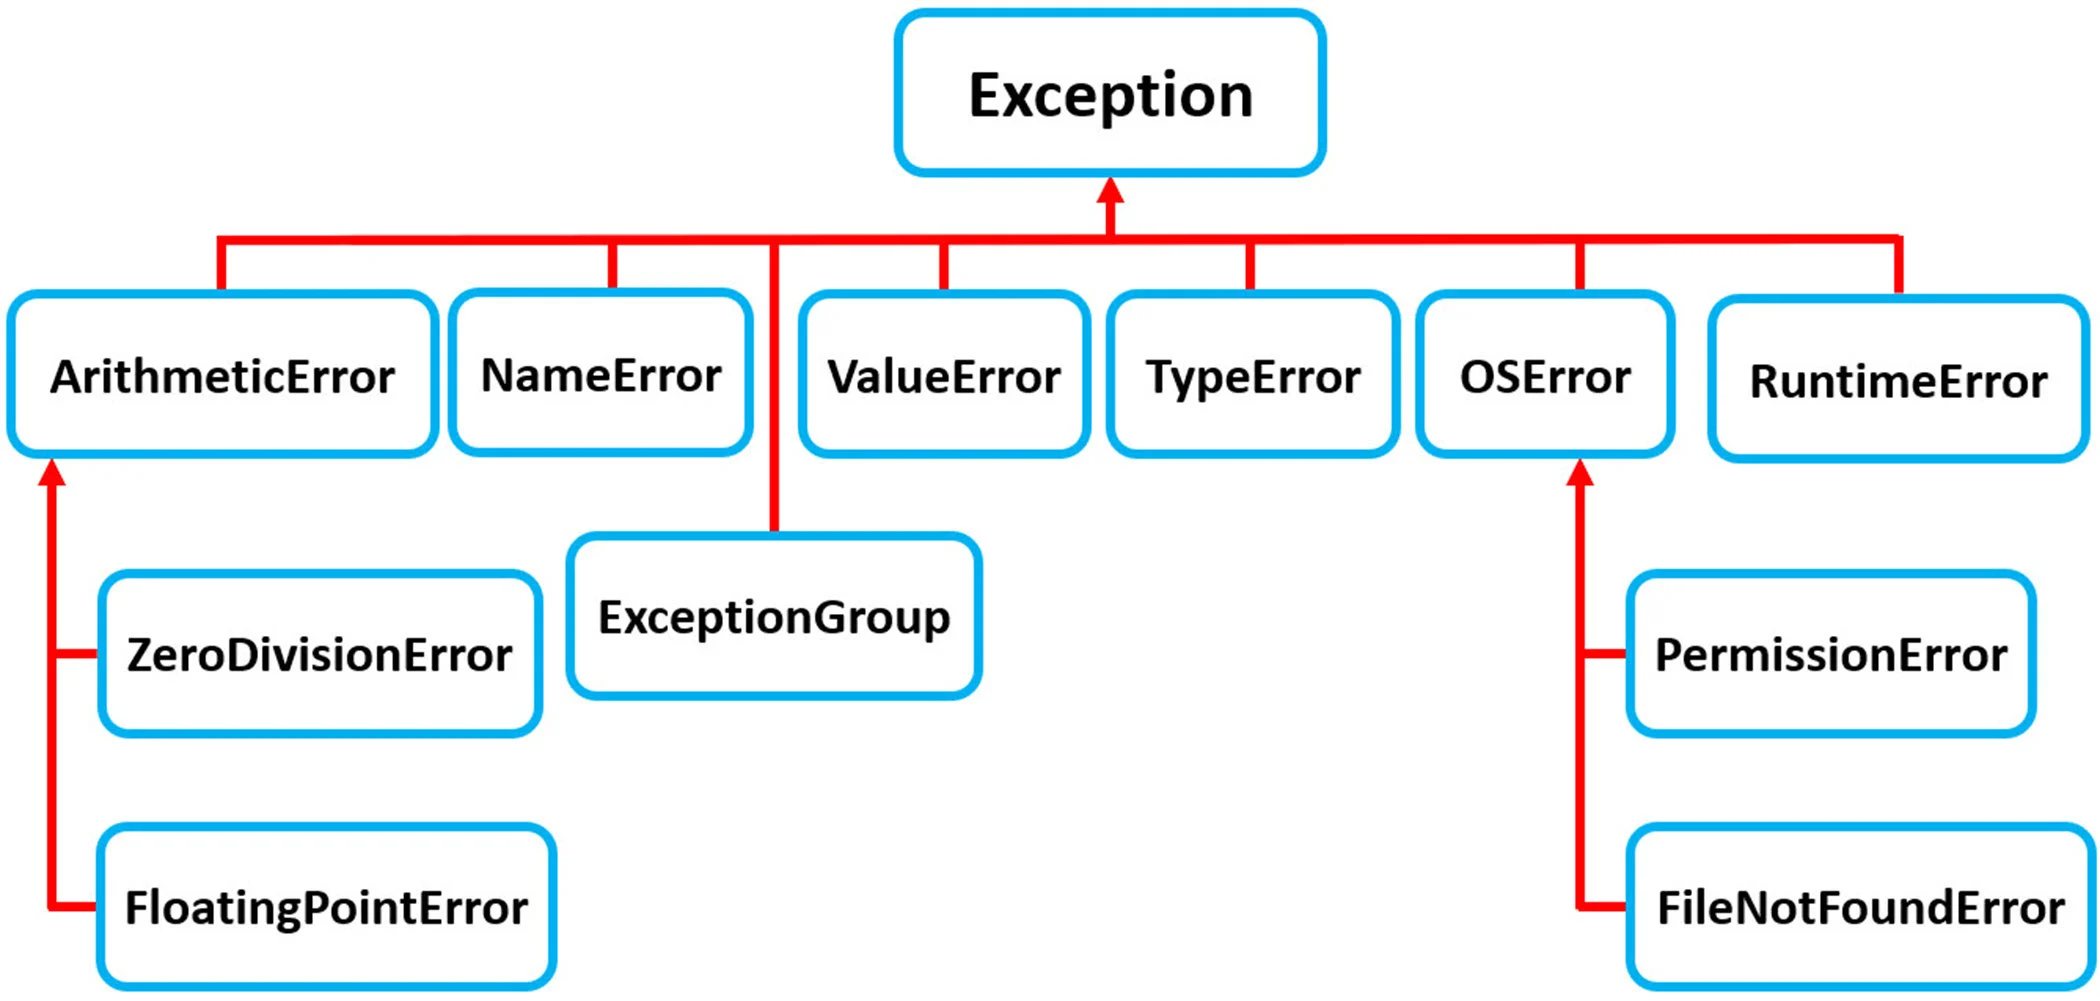

# 2.1.1. SyntaxError
Error de sintaxis: Cuando tenemos instrucciones que no corresponden con la sintaxis propia de Python.

In [ ]:
a === 3

SyntaxError: invalid syntax (<ipython-input-10-ab386a34dccf>, line 1)

# 2.1.2. ValueError
Error de valor: puede ocurrir cuando se envía a una función un paramétro del tipo correcto pero de un valor incorrecto.

In [ ]:
number_to_convert = input("How old are you?: ")
int(number_to_convert)

How old are you?: Simón


ValueError: invalid literal for int() with base 10: 'Simón'

# 2.1.3. TypeError
Error de tipo: por ejemplo cuando intentamos dividir un string por un número, lo cuál no está definido.

In [ ]:
"string" / 3

# __truediv__ (num1, num2):
# validate the data type -> raise Exception -> TypeError

TypeError: unsupported operand type(s) for /: 'str' and 'int'

# 2.1.4. NameError
Error de nombre: pueden surgir cuando intentamos acceder a variables que no existen.

In [ ]:
print(myvariable)

NameError: name 'myvariable' is not defined

# 2.1.5. ZeroDivisionError
Error de división por cero: Surge cuando se intenta dividir un número entre cero.

In [ ]:
a = int(input("Value of a: "))
b = int(input("Value of b: "))
result = a / b
print(result)

print("prediction", 3)

Value of a: 4
Value of b: 0


ZeroDivisionError: division by zero

# 2.1.6. IndexError
Error de índice: Cuando intentamos acceder a posiciones de memoria no disponibles, por ejemplo, cuando intentamos acceder a una posición en un arreglo más allá de su longitud.

In [ ]:
salaries: list = [3, 4, 5, 6, 7]

n = 8

for index in range(0, n):
    salary = salaries[index]
    print(salary)

3
4
5
6
7


IndexError: list index out of range

# 2.1.7. AssertionError

Error de afirmación: evalúa la expresión y si la expresión evalúa a False lanza la excepción (útil para validación de datos y pruebas unitarias).

In [ ]:
amount = int(input("Enter an amount to withdraw: "))
assert amount > 0

print("Amount withdrew!")

Enter an amount to withdraw: -30


AssertionError: 

# 2.1. Cláusula Try-except-else (try-catch)

Por defecto, cuando Python lanza una excepción, la ejecución del programa se detiene abruptamente. Esto no es deseado, si no que es preferible hacer un manejo de errores, donde se pueda controlar el flujo del programa y el error a mostrar.

Consideremos una función *división*. Ésta función tiene varios puntos en los cuales puede fallar, por ejemplo si se envía cero en el divisor o si se envía un string en cualquiera de los parámetros. Debemos saber entonces cómo manejar este bloque de código, para así no interrumpir de manera abrupta la ejecución de nuestro programa. A esto le llamamos manejo de excepciones o errores.

In [ ]:
def division(a: float, b: float) -> float:
    return a / b

result = division("3", 2)
print("Result:", result)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Pero qué sucede si se envía un cero como segundo argumento?
La división por cero no está definida, por tanto, debemos hacer un manejo de errores para prevenir detener la ejecución del programa.

Para esto, usamos la cláusula try - except, la cuál estará buscando por errores y re-dirigirá el flujo acorde a esto.

In [ ]:
print("Program Starts...")
result = division(5, 0)
print("Result:", result)
print("Program Ran Successfully")

Program Starts...


ZeroDivisionError: division by zero

"except ZeroDivisionError as err" solo vigilará por errores de la instancia ZeroDivisionError y lo almacenará como variable "err". Podemos especificar cada una de las excepciones que queremos, por ejemplo:



In [ ]:
print("Program Starts...")

try:
    result = division(5, 3)
    print("Result:", result)
except ZeroDivisionError as err:
    print("[ERROR] Invalid Input: Cannot divide by zero:", err)
except TypeError as err:
    print("[ERROR] Invalid Input: Divison must be between numbers:", err)

print("Program Ran Successfully")

Program Starts...
Result: 1.6666666666666667
Program Ran Successfully


Cuando queremos ejecutar código siempre y cuando no se encuentre algún error podemos usar la cláusula *else*:

In [ ]:
print("Program Starts...")

try:
    result = division(5, 3)
    print("Result:", result)
except ZeroDivisionError as err:
    print("[ERROR] Invalid Input: Cannot divide by zero:", err)
except TypeError as err:
    print("[ERROR] Invalid Input: Divison must be between numbers:", err)
else:
    print("No errors were found!")

print("Program Ran Successfully")

Program Starts...
Result: 1.6666666666666667
No errors were found!
Program Ran Successfully


También tenemos la cláusula "finally" que se ejecutará SIEMPRE que termine el try-except, independiente de si hay o no error:

In [ ]:
print("Program Starts...")

try:
    result = division(5, 0)
    print("Result:", result)
except ZeroDivisionError as err:
    print("[ERROR] Invalid Input: Cannot divide by zero:", err)
except TypeError as err:
    print("[ERROR] Invalid Input: Divison must be between numbers:", err)
else:
    print("No errors were found!")
finally:
    print("Program Ran Successfully")

Program Starts...
[ERROR] Invalid Input: Cannot divide by zero: division by zero
Program Ran Successfully


Para capturar errores sin especificar, usamos la cláusula except sin especificar:



In [ ]:
print("Program Starts...")

try:
    result = division4(5, 0)
    print("Result:", result)
except ZeroDivisionError as err:
    print(f"[ERROR] Invalid Input: Cannot divide by zero: {type(err).__name__} - {err}")
except TypeError as err:
    print(f"[ERROR] Invalid Input: Divison must be between numbers: {type(err).__name__} - {err}")
except Exception as err:
    print(f"[ERROR] Internal Server Error: {type(err).__name__} - {err}")
else:
    print("No errors were found!")
finally:
    print("Program Ran Successfully")

print("Program ends...")

Program Starts...
[ERROR] Internal Server Error: NameError - name 'division4' is not defined
Program Ran Successfully
Program ends...


# 2.2. Levantar excepciones

Podemos también levantar nuestras propias excepciones, de acuerdo a la lógica que queramos ejecutar. De manera general podemos hacerlo con "Exception" pero también podemos especificar un tipo concreto de excepción.

In [ ]:
balance = 1000000

def withdraw(amount: float) -> None:
    global balance

    if not isinstance(amount, (int, float)):
        raise TypeError("Invalid type")
    if amount <= 0:
        raise ValueError("Amount less equal than zero")
    if amount > balance:
        raise ValueError("Amount out of range")

    balance = balance - amount
    print(f"Withdrew Successfully: {balance}")

De la misma forma podríamos capturar dicha excepción usando try - except:

In [ ]:
balance = 1000000

def withdraw(amount: float) -> None:
    global balance

    if not isinstance(amount, (int, float)):
        raise TypeError("Invalid type")
    if amount <= 0:
        raise ValueError("Amount less equal than zero")
    if amount > balance:
        raise ValueError("Amount out of range")

    balance = balance - amount
    print(f"Withdrew Successfully: {balance}")

try:
    withdraw("string")
except Exception as err:
    print(f"An error occured: {err}")
print("Program Ran Successfully")

An error occured: Invalid type
Program Ran Successfully


# 2.2.1. Ejercicio práctico (15 min)
Supongamos una función *pay* que modela el pago de un préstamo:

1. La función tiene varios puntos a validar en los cuales es necesario levantar algunas excepciones. Levante las excepciones necesarias para que el código no se rompa.

2. Haga el llamado a la función para abonar tres valores al préstamo: 230.000, 3'000.000, "string" y -240.000. Haga el manejo de errores necesario usando la cláusula try-except evitando que el código se rompa con éstos llamados. Muestre el mensaje: "Could not pay: TypeError|ValueError"


In [ ]:
loan_amount = 1000000

def pay(amount: float) -> None:
    global loan_amount

    if not isinstance(amount, (int, float)):
        raise TypeError("Invalid type of amount")
    if amount < 0:
        raise ValueError("Amount less than zero")
    if amount > loan_amount:
        raise ValueError("Amount must be less than the loan amount")

    loan_amount -= amount
    print(f"Paid {amount}. The new balance is {loan_amount}")

try:
    pay(230000)
except Exception as err:
    print(f"Could not pay: {type(err).__name__}: {err}")

Paid 230000. The new balance is 770000


# 2.3. Depuración (debug)
Proceso de identificar, analizar y corregir errores (bugs) en un algoritmo.
Pueden ser errores de lógica, de performarce, sintaxis, etc...
Podríamos dividir el proceso de depuración en 6 pasos:

1. **Identificar el error:** Identificar cuál es la funcionalidad que está fallando.
2. **Reproducir el error:** Reproducir y tener claridad sobre el error que se está produciendo.
3. **Usar herramienta de depuración:** Los entornos de desarrollo o editores de texto usualmente tienen incluídas herramientas de depuración, usar éstas es muy útil para encontrar la porción de código que está produciendo el error.
4. **Corregir el error:** Corregir el error respectivo.
5. **Ejecutar pruebas manuales o pruebas unitarias:** Ejecutar pruebas que verifiquen que el error ha sido resuelto.
6. **Documentar:** Documentar bien la solución y el código que se implementó.

# 2.3.1. Depurador o debugger
Es una herramienta que le permite a los desarrolladores ejecutar programas línea por línea, detener la ejecución en puntos específicos (llamados puntos de interrupción) y examinar el estado del programa en cualquier momento. Esto es esencial para identificar errores y comprender el flujo de ejecución de su código.

# 2.3.1. Ejercicio: Depurar y corregir un programa usando el depurador (debugger) de Visual Studio Code

In [ ]:
class Loan:
    loan_amount: float
    interest_rate: float
    term_months: int
    currency: str

    def __init__(self, loan_amount: float, interest_rate: float, term_months: int, currency: str = "USD"):
        self.loan_amount = loan_amount
        self.interest_rate = interest_rate
        self.term_months = term_months
        self.currency = currency

    def __str__(self) -> str:
        # Loan(Amount: 1000000, Interest Rate: 20%, Term: 1 year(s), Currency: COP)
        return f"Loan(Amount: {self.loan_amount}, Interest Rate: {self.interest_rate}%, Term: {self.term_months} year(s), Currency: {self.currency})"

    # Get monthly payment
    def get_monthly_payment(self) -> float:
        rate: float = self.interest_rate / 12 / 100 # Simple Interest
        n: int = self.term_months
        payment: float = (self.loan_amount * rate) / (1 - (1 + rate) ** -n)
        return payment

    # Get total payment
    def get_total_payment(self) -> float:
        return self.get_monthly_payment() * self.term_months

    # Pay some amount
    def pay(self, amount: float) -> None:
        # Validations
        if type(amount) not in (int, float):
            raise TypeError("[Loan.pay] Amount must be a number")
        if amount <= 0:
            raise ValueError("[Loan.pay] Amount must be positive and greater than zero")
        if amount > self.loan_amount:
            raise ValueError("[Loan.pay] Amount must be less than the loan amount")

        self.loan_amount -= amount
        print(f"Paid {amount} {self.currency}. The new balance is {self.loan_amount} {self.currency}")

    # Creates the amortization table with all the payments
    def amortization_table(self) -> list[list[float, float, float]]:
        current_balance: float = self.loan_amount
        table: list = []
        monthly_payment: float = self.get_monthly_payment()

        for _ in range(self.term_months):
            interests_paid: float = current_balance * self.interest_rate / 12 / 100
            paid: float = monthly_payment - interests_paid
            current_balance: float = current_balance - paid
            row = [current_balance if current_balance > 0 else 0, interests_paid, paid]
            table.append(row)

        return table


if __name__ == '__main__':
    print("----- Program Started... -----")
    try:
      # Amount to borrow = 1000 USD, interest rate = 5%, term = 5 months
      loan = Loan(loan_amount=1000, interest_rate=5, term_months=5, currency="USD")
      print(loan)

      # Total payment
      total_payment = loan.get_total_payment()
      print("The total payment for the loan is:", total_payment)
      table = loan.amortization_table()

      # Monthly payment
      monthly_payment = loan.get_monthly_payment()
      print("The monthly payment for the loan is:", monthly_payment)

      # Amortization table
      for month in range(len(table)):
          row = table[month]
          [balance, interests_paid, paid] = row
          print(f"Mes {month + 1}: Saldo: ${balance:.2f}, Interés: ${interests_paid:.2f}, Pagado: ${paid:.2f}")

      # Pay
      loan.pay(130)

      # Error Cases for the pay function
      # Case 1: Amount is not a number - amount = "string"
      # loan.pay("String")

      # Case 2: Amount is less than zero - amount = -1000
      # loan.pay(-1000)

      # Case 3: Amount is greater than the loan amount - amount = 30000
      # loan.pay(30000)
      print("----- Program Ran Successfully ------")
    except Exception as e:
        print(f"[{type(e).__name__}] {e}")


----- Program Started... -----
Loan(Amount: 1000, Interest Rate: 5%, Term: 5 year(s), Currency: USD)
The total payment for the loan is: 1012.5346498249808
The monthly payment for the loan is: 202.50692996499615
Mes 1: Saldo: $801.66, Interés: $4.17, Pagado: $198.34
Mes 2: Saldo: $602.49, Interés: $3.34, Pagado: $199.17
Mes 3: Saldo: $402.50, Interés: $2.51, Pagado: $200.00
Mes 4: Saldo: $201.67, Interés: $1.68, Pagado: $200.83
Mes 5: Saldo: $0.00, Interés: $0.84, Pagado: $201.67
Paid 130 USD. The new balance is 870 USD
----- Program Ran Successfully ------
